In [1]:
# Import some standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [2]:
# Ensure that all plots happen inline
%matplotlib inline

In [3]:
# Load the Boston housing dataset from SciKitLearn
boston = load_boston()

In [4]:
# Look at the Boston housing dataset
boston

{'DESCR': "Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  

In [5]:
#Put data into a dataframe
data = pd.DataFrame(boston.data)

In [6]:
# Set the column names to be the feature names
data.columns = boston.feature_names

In [7]:
#Look at first 5 rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [8]:
# Set the target into another dataframe
target = pd.DataFrame(boston.target)

In [9]:
target.shape

(506, 1)

In [10]:
data.shape

(506, 13)

array([[<matplotlib.axes.AxesSubplot object at 0x5083b50>]], dtype=object)

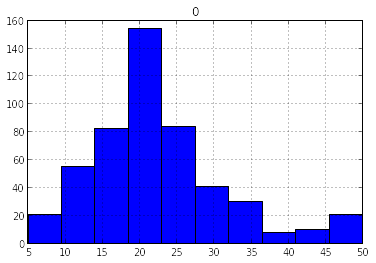

In [11]:
# Look at the distribution of the target data
target.hist()

In [12]:
target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Linear Regression
===

In [13]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2)

In [14]:
# Instantiate a linear regression class
lr = LinearRegression()

In [15]:
# Fit the training data
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# Look at the coefficients
lr.coef_

array([[ -4.23488939e-02,   3.75064265e-02,   2.30574317e-02,
          2.36439298e+00,  -1.70781491e+01,   4.41958813e+00,
         -8.89086699e-03,  -1.45781018e+00,   2.43185071e-01,
         -1.19490184e-02,  -9.69406599e-01,   9.43998322e-03,
         -4.88876298e-01]])

In [17]:
coefs = list(lr.coef_[0])

In [18]:
coefs.sort()

In [19]:
coefs

[-17.078149089765716,
 -1.4578101757513195,
 -0.96940659879776248,
 -0.4888762976418547,
 -0.042348893928220006,
 -0.011949018424690339,
 -0.0088908669876020478,
 0.0094399832222501773,
 0.023057431691629802,
 0.037506426510018537,
 0.24318507117039495,
 2.3643929835177966,
 4.4195881327570516]

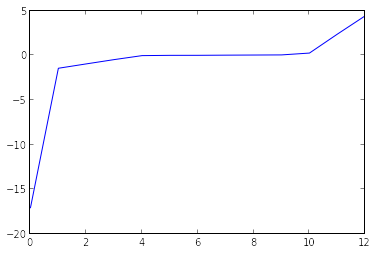

In [20]:
# Plot the coefficients
plt.plot(range(13), coefs)

In [21]:
names = boston.feature_names

In [22]:
# Match the column names with the coefficients
zip(names, lr.coef_[0])

[('CRIM', -0.042348893928220006),
 ('ZN', 0.037506426510018537),
 ('INDUS', 0.023057431691629802),
 ('CHAS', 2.3643929835177966),
 ('NOX', -17.078149089765716),
 ('RM', 4.4195881327570516),
 ('AGE', -0.0088908669876020478),
 ('DIS', -1.4578101757513195),
 ('RAD', 0.24318507117039495),
 ('TAX', -0.011949018424690339),
 ('PTRATIO', -0.96940659879776248),
 ('B', 0.0094399832222501773),
 ('LSTAT', -0.4888762976418547)]

In [23]:
# See how well this model performs
lr.score(X_test, Y_test)

0.59938140334466028